In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
rows = 5
cols = 11
array = np.zeros((rows, cols), dtype=np.uint8)
array[0, 5] = 1
print(array)

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


In [6]:
def plot_ca(array, rows, cols):
    cmap = plt.get_cmap('Blues')
    plt.imshow(array, cmap=cmap, interpolation='none')

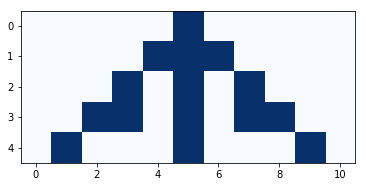

In [16]:
plot_ca(array, rows, cols)

In [8]:
def step(array, i):
    rows, cols = array.shape
    row = array[i-1]
    for j in range(1, cols):
        elts = row[j-1:j+2]
        array[i, j] = sum(elts) % 2

In [15]:
step(array, 4)

In [19]:
def c_k(a, w, k):
    N = len(w)
    return sum(a[k:k+N] * w)

In [21]:
N = 10
row = np.arange(N, dtype=np.uint8)
print(row)

[0 1 2 3 4 5 6 7 8 9]


In [22]:
window = [1, 1, 1]


In [23]:
print(c_k(row, window, 0))

3


In [24]:
print(c_k(row, window, 1))

6


In [25]:
print(c_k(row, window, 2))

9


In [26]:
def correlate(row, window):
    cols = len(row)
    N = len(window)
    c = [c_k(row, window, k) for k in range(cols-N+1)]
    return np.array(c)

In [27]:
print(correlate(row, window))

[ 3  6  9 12 15 18 21 24]


In [28]:
def step2(array, i, window=[1,1,1]):
    row = array[i-1]
    c = np.correlate(row, window, mode='same')
    array[i] = c % 2

In [29]:
def step3(array, i, window=[4, 2, 1]):
    row = array[i-1]
    c = np.correlate(row, window, mode='same')
    array[i] = table[c]

In [ ]:
def make_table(rule):
    rule = np.array([rule], dtype=np.uint8)
    table = np.unpackbits(rule)[::-1]
    return table